In [1]:
import numpy
import plotly.offline
import scipy
import pandas
import matplotlib.pyplot as plt
import sklearn
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

This week, we'll take a look into the available tools while training neural networks, let's train a convolutional neural network on mnist fashion dataset:

Max value: 255, Min value: 0


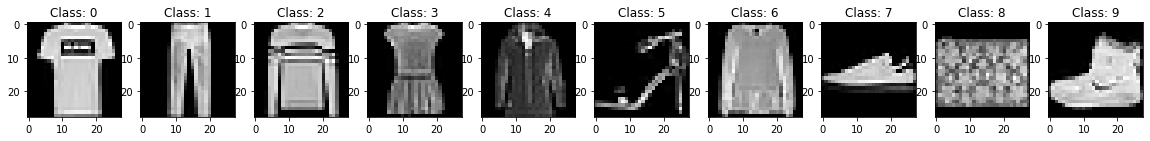

In [40]:
from keras.datasets import fashion_mnist


# importing data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train_sc = X_train / 255
X_test_sc = X_test / 255
Y_train = pandas.get_dummies(Y_train).to_numpy()
Y_test = pandas.get_dummies(Y_test).to_numpy()
# let's see how out labels look
labels_to_plot = list(range(Y_train.shape[1]))
# we need to specify color mapping to draw image correctly
plt.figure(figsize=(20, 200))
[(
    plt.subplot(1, len(labels_to_plot), ind + 1),
    plt.imshow(X_train[Y_train[:, label_ind] == 1][0],
               cmap=plt.get_cmap('gray')),
    plt.title(f'Class: {label_ind}')
  ) for ind, label_ind in enumerate(labels_to_plot)]
print(f'Max value: {X_train.max()}, Min value: {X_train.min()}')

In [42]:
# building the model
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU


model = Sequential()
# since we are working with images, we add a convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear',
                 input_shape=(28 ,28 , 1)))
# leaky relu makes learning non-linear decision boundaries easier
model.add(LeakyReLU(alpha=0.1))
# since we have multiple classes, we add max pooling
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(len(labels_to_plot), activation='softmax'))

# compiling the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# We can alternatively just import the model if we trained it before:
model = keras.models.load_model('trained_model')

In [48]:
# training the model, providing test data to see accuracy on it over the
# iterations
stats = model.fit(X_train_sc, Y_train, batch_size=2000, epochs=30,
                  validation_data=(X_test_sc, Y_test))


Epoch 1/30
30/30 [==============================] - 58s 2s/step - loss: 0.6030 - accuracy: 0.7796 - val_loss: 0.6022 - val_accuracy: 0.7824
Epoch 2/30
30/30 [==============================] - 54s 2s/step - loss: 0.5610 - accuracy: 0.7947 - val_loss: 0.5711 - val_accuracy: 0.7930
Epoch 3/30
30/30 [==============================] - 53s 2s/step - loss: 0.5321 - accuracy: 0.8070 - val_loss: 0.5464 - val_accuracy: 0.8047
Epoch 4/30
30/30 [==============================] - 51s 2s/step - loss: 0.5080 - accuracy: 0.8152 - val_loss: 0.5294 - val_accuracy: 0.8108
Epoch 5/30
30/30 [==============================] - 56s 2s/step - loss: 0.4839 - accuracy: 0.8255 - val_loss: 0.5062 - val_accuracy: 0.8187
Epoch 6/30
30/30 [==============================] - 57s 2s/step - loss: 0.4688 - accuracy: 0.8314 - val_loss: 0.4833 - val_accuracy: 0.8279
Epoch 7/30
30/30 [==============================] - 58s 2s/step - loss: 0.4504 - accuracy: 0.8368 - val_loss: 0.4707 - val_accuracy: 0.8270
Epoch 8/30
30/30 [==

INFO:tensorflow:Assets written to: trained_model/assets


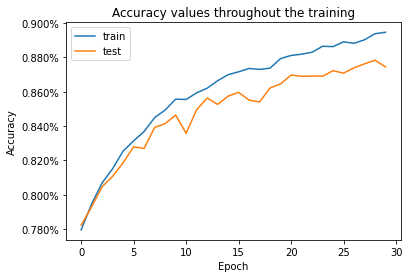

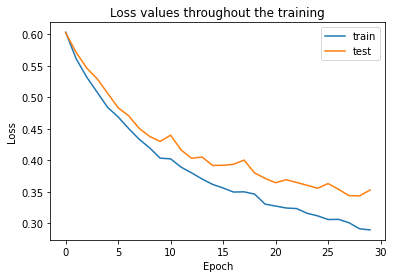

In [53]:
import matplotlib.ticker as mtick  # to format axis as percentage


# save the model first:
model.save('trained_model')
# let's plot the accuracy values throughout the iterations:
train_acc = stats.history['accuracy']
test_acc = stats.history['val_accuracy']
train_loss = stats.history['loss']
test_loss = stats.history['val_loss']
x = range(len(train_acc))
fig1, ax1 = plt.subplots()
ax1.plot(x, train_acc, label='train')
ax1.plot(x, test_acc, label='test')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy values throughout the training')
ax1.legend(loc='best')
ax1.yaxis.set_major_formatter(mtick.PercentFormatter()) # format y as percentage
# same for loss values
fig2, ax2 = plt.subplots()
ax2.plot(x, train_loss, label='train')
ax2.plot(x, test_loss, label='test')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss values throughout the training')
ax2.legend(loc='best')
# show the plots
fig1.show()
fig2.show()

In [58]:
# if you are using google colab, you can use the following commands to download
# the files
from google.colab import files

# convert to zip
!zip -r trained_model.zip trained_model
files.download('trained_model.zip')

  adding: trained_model/ (stored 0%)
  adding: trained_model/saved_model.pb (deflated 89%)
  adding: trained_model/keras_metadata.pb (deflated 92%)
  adding: trained_model/assets/ (stored 0%)
  adding: trained_model/variables/ (stored 0%)
  adding: trained_model/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: trained_model/variables/variables.index (deflated 66%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>